In [2]:
# Import pandas
import pandas as pd

# Import yfinance
import yfinance as yf

# Import numpy
import numpy as np

# Import plot lib
import matplotlib.pyplot as plt

# Import evaluate library
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, mean_absolute_error

# Import the required libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

2025-03-20 10:38:19.373677: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-20 10:38:19.386713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742441899.402878   25472 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742441899.409243   25472 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-20 10:38:19.427678: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
# 'BTC-USD': 'Bitcoin USD',
# 'ETH-USD': 'Ethereum USD',
# 'SOL-USD': 'Solana USD'

crypto = "BTC-USD"
crypto_data = yf.Ticker(crypto)
info = crypto_data.info
for key,value in info.items():
    print(key,' : ',value)

companyOfficers  :  []
name  :  Bitcoin
startDate  :  1278979200
description  :  Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,838,918. The last known price of Bitcoin is 83,477.39501709 USD and is up 0.51 over the last 24 hours. It is currently trading on 11982 active market(s) with $23,514,621,740.72 traded over the last 24 hours. More information can be found at https://bitcoin.org/.
executiveTeam  :  []
maxAge  :  86400
priceHint  :  2
previousClose  :  86870.87
open  :  86870.87
dayLow  :  85743.75
dayHigh  :  87427.31
regularMarketPreviousClose  :  86870.87
regularMarketOpen  :  86870.87
regularMarketDayLow  :  85743.75
regularMarketDayHigh  :  87427.31
volume  :  37224607744
regularMarketVolume  :  37224607744
averageVolume  :  47198447270
averageVolume10days  :  32518714121
averageDailyVolume10Day  :  32518714121
marketCap  :  1703447363584
fiftyTwoWeekLow  :  49121.24
fiftyTw

In [4]:
# Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

# Period must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']

interval = "1d"
period = "10y"

In [5]:
crypto_data_hist = crypto_data.history(interval=interval,period=period)
print(crypto_data_hist)

                                   Open          High           Low  \
Date                                                                  
2015-03-20 00:00:00+00:00    260.955994    264.847992    259.161987   
2015-03-21 00:00:00+00:00    261.644012    262.196014    255.649994   
2015-03-22 00:00:00+00:00    259.916992    269.747009    259.589996   
2015-03-23 00:00:00+00:00    267.894989    277.296997    261.744995   
2015-03-24 00:00:00+00:00    266.576996    267.002991    244.154999   
...                                 ...           ...           ...   
2025-03-15 00:00:00+00:00  83968.406250  84672.671875  83639.593750   
2025-03-16 00:00:00+00:00  84333.320312  85051.601562  82017.906250   
2025-03-17 00:00:00+00:00  82576.335938  84725.328125  82492.156250   
2025-03-18 00:00:00+00:00  84075.718750  84075.718750  81179.992188   
2025-03-20 00:00:00+00:00  86870.867188  87427.312500  85743.750000   

                                  Close       Volume  Dividends  Stock Split

In [6]:
# Clean the data for to keep only the required columns
crypto_data_close = crypto_data_hist[["Close"]]
print(crypto_data_close)

                                  Close
Date                                   
2015-03-20 00:00:00+00:00    261.748993
2015-03-21 00:00:00+00:00    260.024994
2015-03-22 00:00:00+00:00    267.959991
2015-03-23 00:00:00+00:00    266.739990
2015-03-24 00:00:00+00:00    245.595001
...                                 ...
2025-03-15 00:00:00+00:00  84343.109375
2025-03-16 00:00:00+00:00  82579.687500
2025-03-17 00:00:00+00:00  84075.687500
2025-03-18 00:00:00+00:00  82718.500000
2025-03-20 00:00:00+00:00  85862.507812

[3653 rows x 1 columns]


In [7]:
# Fill missing values
crypto_data_close = crypto_data_close.ffill()
print(crypto_data_close)

                                  Close
Date                                   
2015-03-20 00:00:00+00:00    261.748993
2015-03-21 00:00:00+00:00    260.024994
2015-03-22 00:00:00+00:00    267.959991
2015-03-23 00:00:00+00:00    266.739990
2015-03-24 00:00:00+00:00    245.595001
...                                 ...
2025-03-15 00:00:00+00:00  84343.109375
2025-03-16 00:00:00+00:00  82579.687500
2025-03-17 00:00:00+00:00  84075.687500
2025-03-18 00:00:00+00:00  82718.500000
2025-03-20 00:00:00+00:00  85862.507812

[3653 rows x 1 columns]


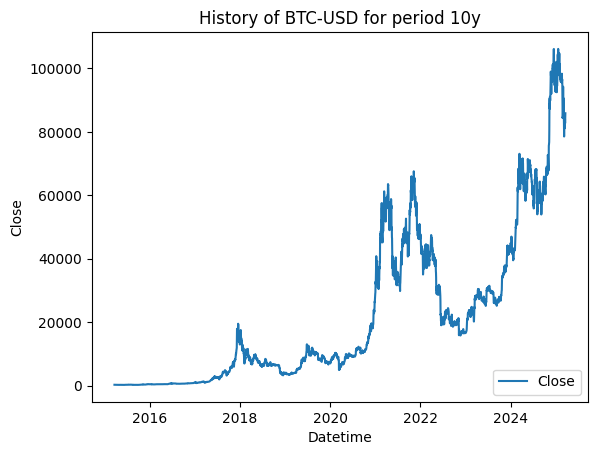

In [8]:
plt.title(f"History of {crypto} for period {period}")
plt.xlabel('Datetime')
plt.ylabel('Close')
 
plt.plot(crypto_data_hist['Close'])

plt.legend(['Close'], loc='lower right')

plt.show()

In [9]:
# Clean the data for to keep only the required columns
crypto_data_close = crypto_data_hist[["Close"]]
print(crypto_data_close)

                                  Close
Date                                   
2015-03-20 00:00:00+00:00    261.748993
2015-03-21 00:00:00+00:00    260.024994
2015-03-22 00:00:00+00:00    267.959991
2015-03-23 00:00:00+00:00    266.739990
2015-03-24 00:00:00+00:00    245.595001
...                                 ...
2025-03-15 00:00:00+00:00  84343.109375
2025-03-16 00:00:00+00:00  82579.687500
2025-03-17 00:00:00+00:00  84075.687500
2025-03-18 00:00:00+00:00  82718.500000
2025-03-20 00:00:00+00:00  85862.507812

[3653 rows x 1 columns]


In [10]:
# Fill missing values
crypto_data_close = crypto_data_close.ffill()
print(crypto_data_close)

                                  Close
Date                                   
2015-03-20 00:00:00+00:00    261.748993
2015-03-21 00:00:00+00:00    260.024994
2015-03-22 00:00:00+00:00    267.959991
2015-03-23 00:00:00+00:00    266.739990
2015-03-24 00:00:00+00:00    245.595001
...                                 ...
2025-03-15 00:00:00+00:00  84343.109375
2025-03-16 00:00:00+00:00  82579.687500
2025-03-17 00:00:00+00:00  84075.687500
2025-03-18 00:00:00+00:00  82718.500000
2025-03-20 00:00:00+00:00  85862.507812

[3653 rows x 1 columns]


In [11]:
# Scale into range 0..1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(crypto_data_close)
print(scaled_data)

[[4.83821447e-04]
 [4.67547444e-04]
 [5.42451299e-04]
 ...
 [7.91660758e-01]
 [7.78849340e-01]
 [8.08527774e-01]]


In [12]:
# Define train size
split = 0.8
train_size = int(len(scaled_data) * split)
print(train_size)

2922


In [13]:
# Define training and testing area before scaled
train_data = crypto_data_close[:train_size]
test_data = crypto_data_close[train_size:]
print("Data Training")
print(train_data)
print("Data Testing")
print(test_data)

Data Training
                                  Close
Date                                   
2015-03-20 00:00:00+00:00    261.748993
2015-03-21 00:00:00+00:00    260.024994
2015-03-22 00:00:00+00:00    267.959991
2015-03-23 00:00:00+00:00    266.739990
2015-03-24 00:00:00+00:00    245.595001
...                                 ...
2023-03-15 00:00:00+00:00  24375.960938
2023-03-16 00:00:00+00:00  25052.789062
2023-03-17 00:00:00+00:00  27423.929688
2023-03-18 00:00:00+00:00  26965.878906
2023-03-19 00:00:00+00:00  28038.675781

[2922 rows x 1 columns]
Data Testing
                                  Close
Date                                   
2023-03-20 00:00:00+00:00  27767.236328
2023-03-21 00:00:00+00:00  28175.816406
2023-03-22 00:00:00+00:00  27307.437500
2023-03-23 00:00:00+00:00  28333.972656
2023-03-24 00:00:00+00:00  27493.285156
...                                 ...
2025-03-15 00:00:00+00:00  84343.109375
2025-03-16 00:00:00+00:00  82579.687500
2025-03-17 00:00:00+00:00  8

In [14]:
# Define training and testing area after scaled
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
print("Data Training")
print(train_data)
print("Data Testing")
print(test_data)

Data Training
[[0.00048382]
 [0.00046755]
 [0.00054245]
 ...
 [0.25688617]
 [0.25256232]
 [0.26268918]]
Data Testing
[[0.26012688]
 [0.26398374]
 [0.25578652]
 [0.26547669]
 [0.25754087]
 [0.25755429]
 [0.26227057]
 [0.25420492]
 [0.25541548]
 [0.26561327]
 [0.26264091]
 [0.26684083]
 [0.26620413]
 [0.2642055 ]
 [0.26034384]
 [0.26391081]
 [0.26400421]
 [0.26274077]
 [0.26162423]
 [0.26183129]
 [0.26546799]
 [0.2779277 ]
 [0.28342234]
 [0.28251607]
 [0.28497052]
 [0.2857883 ]
 [0.28420996]
 [0.28418031]
 [0.27596486]
 [0.28495623]
 [0.27008993]
 [0.26464614]
 [0.25549836]
 [0.26060135]
 [0.2584669 ]
 [0.25784345]
 [0.26522772]
 [0.26631426]
 [0.27623618]
 [0.27497574]
 [0.27410943]
 [0.27430122]
 [0.26318847]
 [0.26874815]
 [0.27182333]
 [0.27032622]
 [0.2768082 ]
 [0.27086345]
 [0.26661895]
 [0.25943813]
 [0.25910304]
 [0.25875359]
 [0.25289186]
 [0.25104358]
 [0.25084618]
 [0.25222966]
 [0.25470338]
 [0.25323038]
 [0.25664898]
 [0.25130052]
 [0.25184726]
 [0.25410766]
 [0.25056061]
 

In [15]:
# lookback = 5
# [30, 31, 94, 50, 27, 68, 37, 69, 27, 57, 25, 48, 50]
# train data  =   [30, 31, 94, 50, 27] => 68
#                 [31, 94, 50, 27, 68] => 37
#                 [94, 50, 27, 68, 37] => 69
#                 ...
#                 [69, 27, 57, 25, 48] => 50
# x train data = ([30, 31, 94, 50, 27], [31, 94, 50, 27, 68], [94, 50, 27, 68, 37], ..., [69, 27, 57, 25, 48])
# y train data = (68, 37, 69, 27, 57, 25, 48, 50)
lookback = int(7)
x_data = []
y_data = []
for i in range(lookback,len(scaled_data)):
    x_data.append(scaled_data[i-lookback:i,0])
    y_data.append(scaled_data[i,0])

# Converting the x and y values to numpy arrays
x_data, y_data = np.array(x_data), np.array(y_data)

# Reshaping x and y data to make the calculations easier
x_data = np.reshape(x_data, (x_data.shape[0],x_data.shape[1],1))
y_data = np.reshape(y_data, (y_data.shape[0],1))
print(f"X Data : {x_data.shape}")
print(x_data)
print(f"Y Data : {y_data.shape}")
print(y_data)

X Data : (3646, 7, 1)
[[[4.83821447e-04]
  [4.67547444e-04]
  [5.42451299e-04]
  ...
  [3.31332900e-04]
  [3.37015636e-04]
  [3.59057213e-04]]

 [[4.67547444e-04]
  [5.42451299e-04]
  [5.30934875e-04]
  ...
  [3.37015636e-04]
  [3.59057213e-04]
  [3.44869458e-04]]

 [[5.42451299e-04]
  [5.30934875e-04]
  [3.31332900e-04]
  ...
  [3.59057213e-04]
  [3.44869458e-04]
  [3.99326958e-04]]

 ...

 [[7.39330110e-01]
  [7.80205925e-01]
  [7.88325453e-01]
  ...
  [7.90654621e-01]
  [7.94185136e-01]
  [7.77538994e-01]]

 [[7.80205925e-01]
  [7.88325453e-01]
  [7.63256902e-01]
  ...
  [7.94185136e-01]
  [7.77538994e-01]
  [7.91660758e-01]]

 [[7.88325453e-01]
  [7.63256902e-01]
  [7.90654621e-01]
  ...
  [7.77538994e-01]
  [7.91660758e-01]
  [7.78849340e-01]]]
Y Data : (3646, 1)
[[3.44869458e-04]
 [3.99326958e-04]
 [3.04127700e-04]
 ...
 [7.91660758e-01]
 [7.78849340e-01]
 [8.08527774e-01]]


In [16]:
xy_train_size = int(x_data.shape[0]*split)
print(xy_train_size)

2916


In [17]:
x_train_data = x_data[:xy_train_size,:,:]
y_train_data = y_data[:xy_train_size,:]
print("X Train Data")
print(x_train_data)
print("Y Train Data")
print(y_train_data)

X Train Data
[[[0.00048382]
  [0.00046755]
  [0.00054245]
  ...
  [0.00033133]
  [0.00033702]
  [0.00035906]]

 [[0.00046755]
  [0.00054245]
  [0.00053093]
  ...
  [0.00033702]
  [0.00035906]
  [0.00034487]]

 [[0.00054245]
  [0.00053093]
  [0.00033133]
  ...
  [0.00035906]
  [0.00034487]
  [0.00039933]]

 ...

 [[0.19277639]
  [0.20723363]
  [0.22643002]
  ...
  [0.22811432]
  [0.23450336]
  [0.25688617]]

 [[0.20723363]
  [0.22643002]
  [0.23160807]
  ...
  [0.23450336]
  [0.25688617]
  [0.25256232]]

 [[0.22643002]
  [0.23160807]
  [0.22811432]
  ...
  [0.25688617]
  [0.25256232]
  [0.26268918]]]
Y Train Data
[[0.00034487]
 [0.00039933]
 [0.00030413]
 ...
 [0.25256232]
 [0.26268918]
 [0.26012688]]


In [18]:

x_test_data = x_data[xy_train_size:,:,:]
y_test_data = y_data[xy_train_size:,:]
print("X Test Data")
print(x_test_data)
print("Y Test Data")
print(y_test_data)

X Test Data
[[[0.23160807]
  [0.22811432]
  [0.23450336]
  ...
  [0.25256232]
  [0.26268918]
  [0.26012688]]

 [[0.22811432]
  [0.23450336]
  [0.25688617]
  ...
  [0.26268918]
  [0.26012688]
  [0.26398374]]

 [[0.23450336]
  [0.25688617]
  [0.25256232]
  ...
  [0.26012688]
  [0.26398374]
  [0.25578652]]

 ...

 [[0.73933011]
  [0.78020593]
  [0.78832545]
  ...
  [0.79065462]
  [0.79418514]
  [0.77753899]]

 [[0.78020593]
  [0.78832545]
  [0.7632569 ]
  ...
  [0.79418514]
  [0.77753899]
  [0.79166076]]

 [[0.78832545]
  [0.7632569 ]
  [0.79065462]
  ...
  [0.77753899]
  [0.79166076]
  [0.77884934]]]
Y Test Data
[[0.26398374]
 [0.25578652]
 [0.26547669]
 [0.25754087]
 [0.25755429]
 [0.26227057]
 [0.25420492]
 [0.25541548]
 [0.26561327]
 [0.26264091]
 [0.26684083]
 [0.26620413]
 [0.2642055 ]
 [0.26034384]
 [0.26391081]
 [0.26400421]
 [0.26274077]
 [0.26162423]
 [0.26183129]
 [0.26546799]
 [0.2779277 ]
 [0.28342234]
 [0.28251607]
 [0.28497052]
 [0.2857883 ]
 [0.28420996]
 [0.28418031]
 [0.

In [19]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train_data.shape[1],x_train_data.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.summary()

epoch = 200

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data, y_train_data, epochs=epoch, batch_size=32)

I0000 00:00:1742441902.239343   25472 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 177 MB memory:  -> device: 0, name: NVIDIA GeForce MX330, pci bus id: 0000:01:00.0, compute capability: 6.1
2025-03-20 10:38:22.254112: I external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1193] failed to allocate 177.62MiB (186253312 bytes) from device: RESOURCE_EXHAUSTED: : CUDA_ERROR_OUT_OF_MEMORY: out of memory
/home/acelanchester/miniconda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


I0000 00:00:1742441904.740398   25680 cuda_dnn.cc:529] Loaded cuDNN version 90300


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0138
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5499e-04
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 2.1738e-04
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 2.3938e-04
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3999e-04
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6895e-04
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4540e-04
Epoch 8/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1797e-04
Epoch 9/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1812e-04
Epoch 10/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0734e-04
Epoch 11/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2274e-04
Epoch 12/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 2.0276e-04
Epoch 13/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 1.9650e-04
Epoch 14/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.9905e-04
Epoch 15/200
92/92 ━━━━━━

In [20]:
# Save the model to a file
model.save('rnnbtc1d.keras')

In [21]:
# Predict data for test data
predictions = model.predict(x_test_data)
predictions = scaler.inverse_transform(predictions)
print(predictions)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[ 27631.373]
 [ 28019.36 ]
 [ 27169.107]
 [ 28121.69 ]
 [ 27332.627]
 [ 27315.197]
 [ 27782.178]
 [ 26981.121]
 [ 27076.455]
 [ 28115.053]
 [ 27865.986]
 [ 28302.549]
 [ 28243.182]
 [ 28039.604]
 [ 27623.936]
 [ 27964.176]
 [ 27985.777]
 [ 27866.518]
 [ 27746.547]
 [ 27760.791]
 [ 28134.32 ]
 [ 29435.457]
 [ 30063.275]
 [ 30012.135]
 [ 30255.146]
 [ 30330.633]
 [ 30164.041]
 [ 30145.277]
 [ 29293.998]
 [ 30180.139]
 [ 28679.34 ]
 [ 28076.422]
 [ 27084.836]
 [ 27567.436]
 [ 27374.424]
 [ 27327.494]
 [ 28090.537]
 [ 28241.467]
 [ 29282.596]
 [ 29190.15 ]
 [ 29107.352]
 [ 29105.316]
 [ 27954.566]
 [ 28467.36 ]
 [ 28789.744]
 [ 28671.87 ]
 [ 29339.723]
 [ 28754.258]
 [ 28302.238]
 [ 27525.654]
 [ 27450.262]
 [ 27407.256]
 [ 26815.732]
 [ 26606.96 ]
 [ 26575.193]
 [ 26722.562]
 [ 26989.56 ]
 [ 26857.27 ]
 [ 27206.982]
 [ 26669.188]
 [ 26703.414]
 [ 26925.951]
 [ 26576.576]
 [ 26658.844]
 [ 27020.387]
 [ 26179.328]
 [ 26279.805]
 [ 26506.967]
 [ 26671.

In [22]:
y_test = y_test_data.reshape(y_test_data.shape[0],1)
y_test = scaler.inverse_transform(y_test)
print(y_test)

[[ 28175.81640625]
 [ 27307.4375    ]
 [ 28333.97265625]
 [ 27493.28515625]
 [ 27494.70703125]
 [ 27994.33007812]
 [ 27139.88867187]
 [ 27268.13085938]
 [ 28348.44140625]
 [ 28033.5625    ]
 [ 28478.484375  ]
 [ 28411.03515625]
 [ 28199.30859375]
 [ 27790.22070312]
 [ 28168.08984375]
 [ 28177.984375  ]
 [ 28044.140625  ]
 [ 27925.859375  ]
 [ 27947.79492188]
 [ 28333.05078125]
 [ 29652.98046875]
 [ 30235.05859375]
 [ 30139.05273438]
 [ 30399.06640625]
 [ 30485.69921875]
 [ 30318.49609375]
 [ 30315.35546875]
 [ 29445.04492188]
 [ 30397.55273438]
 [ 28822.6796875 ]
 [ 28245.98828125]
 [ 27276.91015625]
 [ 27817.5       ]
 [ 27591.38476562]
 [ 27525.33984375]
 [ 28307.59765625]
 [ 28422.70117188]
 [ 29473.78710938]
 [ 29340.26171875]
 [ 29248.48828125]
 [ 29268.80664062]
 [ 28091.56835938]
 [ 28680.53710937]
 [ 29006.30859375]
 [ 28847.7109375 ]
 [ 29534.38476562]
 [ 28904.62304688]
 [ 28454.97851562]
 [ 27694.2734375 ]
 [ 27658.77539063]
 [ 27621.75585938]
 [ 27000.7890625 ]
 [ 26804.990

In [23]:
# Difference of y_test and predictions
print("Difference of actual and prediction")
print(predictions-y_test)

Difference of actual and prediction
[[-5.44443359e+02]
 [ 7.11921875e+02]
 [-1.16486523e+03]
 [ 6.28404297e+02]
 [-1.62080078e+02]
 [-6.79132812e+02]
 [ 6.42289063e+02]
 [-2.87009766e+02]
 [-1.27198633e+03]
 [ 8.14902344e+01]
 [-6.12498047e+02]
 [-1.08486328e+02]
 [ 4.38730469e+01]
 [ 2.49382812e+02]
 [-5.44154297e+02]
 [-2.13808594e+02]
 [-5.83632812e+01]
 [-5.93417969e+01]
 [-2.01248047e+02]
 [-5.72259766e+02]
 [-1.51866016e+03]
 [-7.99601562e+02]
 [-7.57773438e+01]
 [-3.86931641e+02]
 [-2.30552734e+02]
 [ 1.21367188e+01]
 [-1.51314453e+02]
 [ 7.00232422e+02]
 [-1.10355469e+03]
 [ 1.35745898e+03]
 [ 4.33351562e+02]
 [ 7.99511719e+02]
 [-7.32664063e+02]
 [-2.39492188e+01]
 [-1.50916016e+02]
 [-9.80103516e+02]
 [-3.32164062e+02]
 [-1.23232031e+03]
 [-5.76660156e+01]
 [-5.83378906e+01]
 [-1.61455078e+02]
 [ 1.01374805e+03]
 [-7.25970703e+02]
 [-5.38949219e+02]
 [-5.79667969e+01]
 [-8.62515625e+02]
 [ 4.35099609e+02]
 [ 2.99279297e+02]
 [ 6.07964844e+02]
 [-1.33121094e+02]
 [-1.71494141e

In [24]:
# Evaluation
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
print(f"Mean Squared Error              : {mse}")
print(f"Mean Absolute Error             : {mae}")
print(f"Root Mean Squared Error         : {rmse}")
print(f"Mean Absolute Percentage Error  : {mape}")

Mean Squared Error              : 4679541.0556293335
Mean Absolute Error             : 1409.9071703767122
Root Mean Squared Error         : 2163.2246891225454
Mean Absolute Percentage Error  : 0.022169775172494792


In [25]:
predict = pd.DataFrame(predictions,index=crypto_data_close.index[xy_train_size+lookback:],columns=["Close"])
print(predict)

                                  Close
Date                                   
2023-03-21 00:00:00+00:00  27631.373047
2023-03-22 00:00:00+00:00  28019.359375
2023-03-23 00:00:00+00:00  27169.107422
2023-03-24 00:00:00+00:00  28121.689453
2023-03-25 00:00:00+00:00  27332.626953
...                                 ...
2025-03-15 00:00:00+00:00  82076.921875
2025-03-16 00:00:00+00:00  82190.335938
2025-03-17 00:00:00+00:00  80796.507812
2025-03-18 00:00:00+00:00  82129.703125
2025-03-20 00:00:00+00:00  80759.054688

[730 rows x 1 columns]


In [26]:
train = crypto_data_close[:xy_train_size+lookback]
valid = crypto_data_close[xy_train_size+lookback:]
print("Train Data")
print(train["Close"])
print("Valid Data")
print(valid["Close"])
print("Predict Data")
print(predict)

Train Data
Date
2015-03-20 00:00:00+00:00      261.748993
2015-03-21 00:00:00+00:00      260.024994
2015-03-22 00:00:00+00:00      267.959991
2015-03-23 00:00:00+00:00      266.739990
2015-03-24 00:00:00+00:00      245.595001
                                 ...     
2023-03-16 00:00:00+00:00    25052.789062
2023-03-17 00:00:00+00:00    27423.929688
2023-03-18 00:00:00+00:00    26965.878906
2023-03-19 00:00:00+00:00    28038.675781
2023-03-20 00:00:00+00:00    27767.236328
Name: Close, Length: 2923, dtype: float64
Valid Data
Date
2023-03-21 00:00:00+00:00    28175.816406
2023-03-22 00:00:00+00:00    27307.437500
2023-03-23 00:00:00+00:00    28333.972656
2023-03-24 00:00:00+00:00    27493.285156
2023-03-25 00:00:00+00:00    27494.707031
                                 ...     
2025-03-15 00:00:00+00:00    84343.109375
2025-03-16 00:00:00+00:00    82579.687500
2025-03-17 00:00:00+00:00    84075.687500
2025-03-18 00:00:00+00:00    82718.500000
2025-03-20 00:00:00+00:00    85862.507812
Na

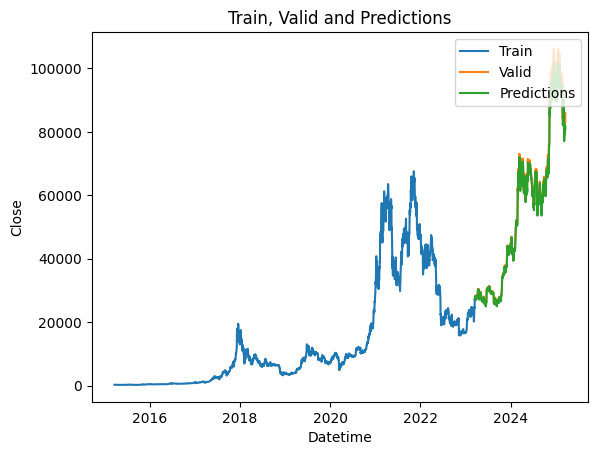

In [27]:
plt.title('Train, Valid and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.plot(predict)
 
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper right')
 
plt.show()

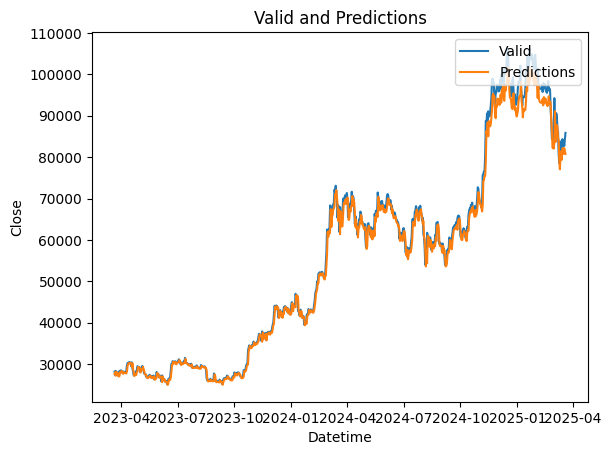

In [28]:
plt.title('Valid and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(valid[['Close']])
plt.plot(predict)
 
plt.legend(['Valid', 'Predictions'], loc='upper right')
 
plt.show()

In [29]:
closing_prices = scaled_data[len(scaled_data)-lookback:]
closing_prices = closing_prices.reshape(closing_prices.shape[0], 1)
print(closing_prices)

[[0.7632569 ]
 [0.79065462]
 [0.79418514]
 [0.77753899]
 [0.79166076]
 [0.77884934]
 [0.80852777]]


In [30]:
current_batch = closing_prices.reshape(1, lookback, 1)
print(current_batch)

[[[0.7632569 ]
  [0.79065462]
  [0.79418514]
  [0.77753899]
  [0.79166076]
  [0.77884934]
  [0.80852777]]]


In [31]:
predictions = []
time = int(7)
for i in range(time):  # Predicting 7 days
    # Get the prediction (next day)
    next_prediction = model.predict(current_batch)
    # print(scaler.inverse_transform(next_prediction))
    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    
    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    
    # Inverse transform the prediction to the original price scale
    predictions.append(scaler.inverse_transform(next_prediction)[0, 0])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[np.float32(83752.72), np.float32(81638.48), np.float32(80026.81), np.float32(78375.64), np.float32(76793.08), np.float32(75280.414), np.float32(73851.43)]


In [32]:
last_time = crypto_data_close.index[-1]
next_time = last_time + pd.Timedelta(days=1)
prediction_times = pd.date_range(start=next_time, periods=len(predictions), freq='1d')
predict = pd.DataFrame(index=prediction_times, data=predictions, columns=['Close'])
print(predict)

                                  Close
2025-03-21 00:00:00+00:00  83752.718750
2025-03-22 00:00:00+00:00  81638.476562
2025-03-23 00:00:00+00:00  80026.812500
2025-03-24 00:00:00+00:00  78375.640625
2025-03-25 00:00:00+00:00  76793.078125
2025-03-26 00:00:00+00:00  75280.414062
2025-03-27 00:00:00+00:00  73851.429688


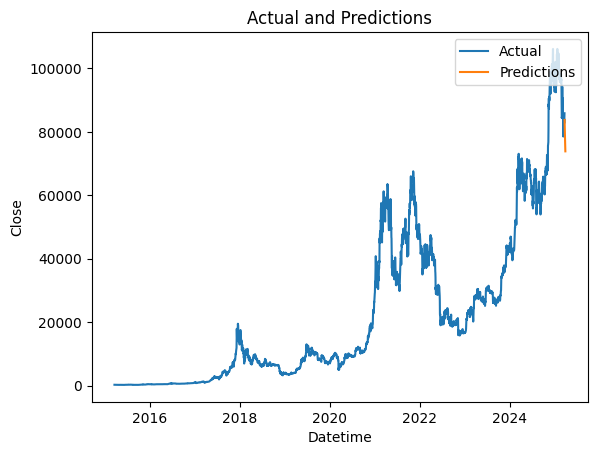

In [33]:
plt.title('Actual and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(crypto_data_close[['Close']])
plt.plot(predict)
 
plt.legend(['Actual', 'Predictions'], loc='upper right')
 
plt.show()

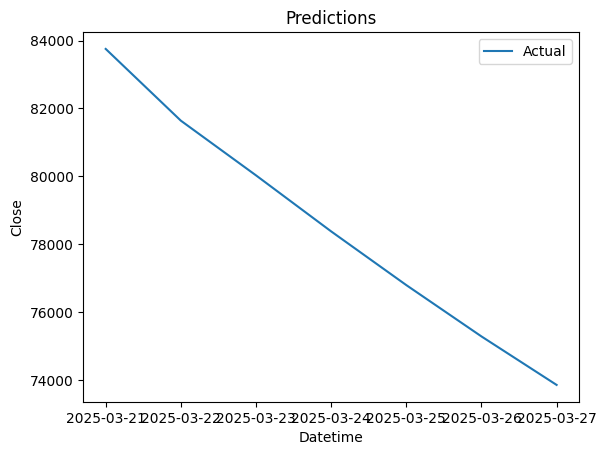

In [34]:
plt.title('Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(predict)
 
plt.legend(['Actual', 'Predictions'], loc='upper right')
 
plt.show()